# NumPy Aggregations & Broadcasting

## Aggregations

In [1]:
import numpy as np

#### Summing the Values in an Array

In [2]:
L = np.random.random(100)
# python built-in
sum(L)

50.325270320292837

In [3]:
# numpy sum
np.sum(L)

50.325270320292823

In [4]:
# NumPy sum is much faster
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

10 loops, best of 3: 122 ms per loop
1000 loops, best of 3: 704 µs per loop


#### Minimum and Maximum

In [5]:
min(big_array), max(big_array)

(2.0997321714677497e-07, 0.99999917696465113)

In [6]:
np.min(big_array), np.max(big_array)

(2.0997321714677497e-07, 0.99999917696465113)

In [7]:
%timeit min(big_array)
%timeit np.min(big_array)

10 loops, best of 3: 87.4 ms per loop
1000 loops, best of 3: 692 µs per loop


In [8]:
print big_array.min(), big_array.max(), big_array.sum()

2.09973217147e-07 0.999999176965 499880.80269


#### Multidimensional Aggregates

In [9]:
M = np.random.random((3,4))
print M

[[ 0.6648853   0.81843386  0.1693051   0.19476909]
 [ 0.64344566  0.02619352  0.22060045  0.8558709 ]
 [ 0.27659806  0.13539676  0.16042455  0.64009956]]


In [10]:
M.sum()

4.8060228003427437

In [11]:
# Return the minimum value of each column
M.min(axis=0)

array([ 0.27659806,  0.02619352,  0.16042455,  0.19476909])

In [12]:
# Return the max value of each row
M.max(axis=1)

array([ 0.81843386,  0.8558709 ,  0.64009956])

#### Other Aggregation Functions

| Function Name | NaN-safe Version | Description                               |
|---------------|------------------|-------------------------------------------|
| np.sum        | np.nansum        | Compute sum of elements                   |
| np.prod       | np.nanprod       | Compute product of elements               |
| np.mean       | np.nanmean       | Compute median of elements                |
| np.std        | np.nanstd        | Compute standard deviation                |
| np.var        | np.nanvar        | Compute variance                          |
| np.min        | np.nanmin        | Find min value                            |
| np.max        | np.nanmax        | Find max value                            |
| np.argmin     | np.nanargmin     | Find index of min value                   |
| np.argmax     | np.nanargmax     | Find index of max value                   |
| np.median     | np.nanmedian     | Compute median of elements                |
| np.percentile | np.nanpercentile | Compute rank-based statistics of elements |
| np.any        | N/A              | Evaluate whether any elements are true    |
| np.all        | N/A              | Evaluate whether all elements are true    |

### Example: What is the Average Height of US Presidents?

In [16]:
!head -4 data/president_heights.csv

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189


In [17]:
import pandas as pd
data = pd.read_csv('data/president_heights.csv')
heights = np.array(data['height(cm)'])
print heights

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


In [18]:
print "Mean height: ", heights.mean()
print "Standard Deviation: ", heights.std()
print "Minimum height: ", heights.min()
print "Maximum height: ", heights.max()

Mean height:  179.738095238
Standard Deviation:  6.93184344275
Minimum height:  163
Maximum height:  193


In [20]:
print "25th percentile: ", np.percentile(heights, 25)
print "Median: ", np.median(heights)
print "75th percentile: ", np.percentile(heights, 75)

 25th percentile:  174.25
Median:  182.0
75th percentile:  183.0


In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
sns.set()

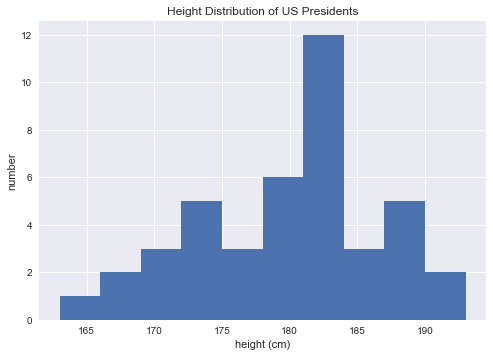

In [28]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');

## Computation on Arrays: Broadcasting

In [29]:
a = np.array([0,1,2])
b = np.array([5,5,5])
a + b

array([5, 6, 7])

In [30]:
a + 5

array([5, 6, 7])

In [31]:
M = np.ones((3,3))
M

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [32]:
M + a

array([[ 1.,  2.,  3.],
       [ 1.,  2.,  3.],
       [ 1.,  2.,  3.]])

In [35]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]

print a
print b

[0 1 2]
[[0]
 [1]
 [2]]


In [36]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

(0.5, 12.5)

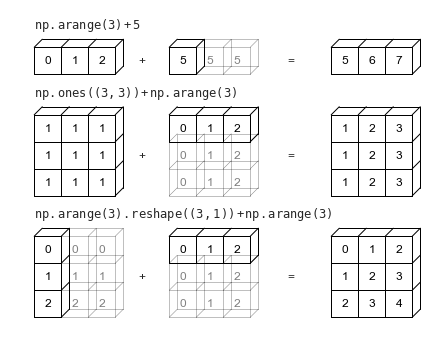

In [38]:
# Adapted from astroML: see http://www.astroml.org/book_figures/appendix/fig_broadcast_visual.html
import numpy as np
from matplotlib import pyplot as plt

#------------------------------------------------------------
# Draw a figure and axis with no boundary
fig = plt.figure(figsize=(6, 4.5), facecolor='w')
ax = plt.axes([0, 0, 1, 1], xticks=[], yticks=[], frameon=False)


def draw_cube(ax, xy, size, depth=0.4,
              edges=None, label=None, label_kwargs=None, **kwargs):
    """draw and label a cube.  edges is a list of numbers between
    1 and 12, specifying which of the 12 cube edges to draw"""
    if edges is None:
        edges = range(1, 13)

    x, y = xy

    if 1 in edges:
        ax.plot([x, x + size],
                [y + size, y + size], **kwargs)
    if 2 in edges:
        ax.plot([x + size, x + size],
                [y, y + size], **kwargs)
    if 3 in edges:
        ax.plot([x, x + size],
                [y, y], **kwargs)
    if 4 in edges:
        ax.plot([x, x],
                [y, y + size], **kwargs)

    if 5 in edges:
        ax.plot([x, x + depth],
                [y + size, y + depth + size], **kwargs)
    if 6 in edges:
        ax.plot([x + size, x + size + depth],
                [y + size, y + depth + size], **kwargs)
    if 7 in edges:
        ax.plot([x + size, x + size + depth],
                [y, y + depth], **kwargs)
    if 8 in edges:
        ax.plot([x, x + depth],
                [y, y + depth], **kwargs)

    if 9 in edges:
        ax.plot([x + depth, x + depth + size],
                [y + depth + size, y + depth + size], **kwargs)
    if 10 in edges:
        ax.plot([x + depth + size, x + depth + size],
                [y + depth, y + depth + size], **kwargs)
    if 11 in edges:
        ax.plot([x + depth, x + depth + size],
                [y + depth, y + depth], **kwargs)
    if 12 in edges:
        ax.plot([x + depth, x + depth],
                [y + depth, y + depth + size], **kwargs)

    if label:
        if label_kwargs is None:
            label_kwargs = {}
        ax.text(x + 0.5 * size, y + 0.5 * size, label,
                ha='center', va='center', **label_kwargs)

solid = dict(c='black', ls='-', lw=1,
             label_kwargs=dict(color='k'))
dotted = dict(c='black', ls='-', lw=0.5, alpha=0.5,
              label_kwargs=dict(color='gray'))
depth = 0.3

#------------------------------------------------------------
# Draw top operation: vector plus scalar
draw_cube(ax, (1, 10), 1, depth, [1, 2, 3, 4, 5, 6, 9], '0', **solid)
draw_cube(ax, (2, 10), 1, depth, [1, 2, 3, 6, 9], '1', **solid)
draw_cube(ax, (3, 10), 1, depth, [1, 2, 3, 6, 7, 9, 10], '2', **solid)

draw_cube(ax, (6, 10), 1, depth, [1, 2, 3, 4, 5, 6, 7, 9, 10], '5', **solid)
draw_cube(ax, (7, 10), 1, depth, [1, 2, 3, 6, 7, 9, 10, 11], '5', **dotted)
draw_cube(ax, (8, 10), 1, depth, [1, 2, 3, 6, 7, 9, 10, 11], '5', **dotted)

draw_cube(ax, (12, 10), 1, depth, [1, 2, 3, 4, 5, 6, 9], '5', **solid)
draw_cube(ax, (13, 10), 1, depth, [1, 2, 3, 6, 9], '6', **solid)
draw_cube(ax, (14, 10), 1, depth, [1, 2, 3, 6, 7, 9, 10], '7', **solid)

ax.text(5, 10.5, '+', size=12, ha='center', va='center')
ax.text(10.5, 10.5, '=', size=12, ha='center', va='center')
ax.text(1, 11.5, r'${\tt np.arange(3) + 5}$',
        size=12, ha='left', va='bottom')

#------------------------------------------------------------
# Draw middle operation: matrix plus vector

# first block
draw_cube(ax, (1, 7.5), 1, depth, [1, 2, 3, 4, 5, 6, 9], '1', **solid)
draw_cube(ax, (2, 7.5), 1, depth, [1, 2, 3, 6, 9], '1', **solid)
draw_cube(ax, (3, 7.5), 1, depth, [1, 2, 3, 6, 7, 9, 10], '1', **solid)

draw_cube(ax, (1, 6.5), 1, depth, [2, 3, 4], '1', **solid)
draw_cube(ax, (2, 6.5), 1, depth, [2, 3], '1', **solid)
draw_cube(ax, (3, 6.5), 1, depth, [2, 3, 7, 10], '1', **solid)

draw_cube(ax, (1, 5.5), 1, depth, [2, 3, 4], '1', **solid)
draw_cube(ax, (2, 5.5), 1, depth, [2, 3], '1', **solid)
draw_cube(ax, (3, 5.5), 1, depth, [2, 3, 7, 10], '1', **solid)

# second block
draw_cube(ax, (6, 7.5), 1, depth, [1, 2, 3, 4, 5, 6, 9], '0', **solid)
draw_cube(ax, (7, 7.5), 1, depth, [1, 2, 3, 6, 9], '1', **solid)
draw_cube(ax, (8, 7.5), 1, depth, [1, 2, 3, 6, 7, 9, 10], '2', **solid)

draw_cube(ax, (6, 6.5), 1, depth, range(2, 13), '0', **dotted)
draw_cube(ax, (7, 6.5), 1, depth, [2, 3, 6, 7, 9, 10, 11], '1', **dotted)
draw_cube(ax, (8, 6.5), 1, depth, [2, 3, 6, 7, 9, 10, 11], '2', **dotted)

draw_cube(ax, (6, 5.5), 1, depth, [2, 3, 4, 7, 8, 10, 11, 12], '0', **dotted)
draw_cube(ax, (7, 5.5), 1, depth, [2, 3, 7, 10, 11], '1', **dotted)
draw_cube(ax, (8, 5.5), 1, depth, [2, 3, 7, 10, 11], '2', **dotted)

# third block
draw_cube(ax, (12, 7.5), 1, depth, [1, 2, 3, 4, 5, 6, 9], '1', **solid)
draw_cube(ax, (13, 7.5), 1, depth, [1, 2, 3, 6, 9], '2', **solid)
draw_cube(ax, (14, 7.5), 1, depth, [1, 2, 3, 6, 7, 9, 10], '3', **solid)

draw_cube(ax, (12, 6.5), 1, depth, [2, 3, 4], '1', **solid)
draw_cube(ax, (13, 6.5), 1, depth, [2, 3], '2', **solid)
draw_cube(ax, (14, 6.5), 1, depth, [2, 3, 7, 10], '3', **solid)

draw_cube(ax, (12, 5.5), 1, depth, [2, 3, 4], '1', **solid)
draw_cube(ax, (13, 5.5), 1, depth, [2, 3], '2', **solid)
draw_cube(ax, (14, 5.5), 1, depth, [2, 3, 7, 10], '3', **solid)

ax.text(5, 7.0, '+', size=12, ha='center', va='center')
ax.text(10.5, 7.0, '=', size=12, ha='center', va='center')
ax.text(1, 9.0, r'${\tt np.ones((3,\, 3)) + np.arange(3)}$',
        size=12, ha='left', va='bottom')

#------------------------------------------------------------
# Draw bottom operation: vector plus vector, double broadcast

# first block
draw_cube(ax, (1, 3), 1, depth, [1, 2, 3, 4, 5, 6, 7, 9, 10], '0', **solid)
draw_cube(ax, (1, 2), 1, depth, [2, 3, 4, 7, 10], '1', **solid)
draw_cube(ax, (1, 1), 1, depth, [2, 3, 4, 7, 10], '2', **solid)

draw_cube(ax, (2, 3), 1, depth, [1, 2, 3, 6, 7, 9, 10, 11], '0', **dotted)
draw_cube(ax, (2, 2), 1, depth, [2, 3, 7, 10, 11], '1', **dotted)
draw_cube(ax, (2, 1), 1, depth, [2, 3, 7, 10, 11], '2', **dotted)

draw_cube(ax, (3, 3), 1, depth, [1, 2, 3, 6, 7, 9, 10, 11], '0', **dotted)
draw_cube(ax, (3, 2), 1, depth, [2, 3, 7, 10, 11], '1', **dotted)
draw_cube(ax, (3, 1), 1, depth, [2, 3, 7, 10, 11], '2', **dotted)

# second block
draw_cube(ax, (6, 3), 1, depth, [1, 2, 3, 4, 5, 6, 9], '0', **solid)
draw_cube(ax, (7, 3), 1, depth, [1, 2, 3, 6, 9], '1', **solid)
draw_cube(ax, (8, 3), 1, depth, [1, 2, 3, 6, 7, 9, 10], '2', **solid)

draw_cube(ax, (6, 2), 1, depth, range(2, 13), '0', **dotted)
draw_cube(ax, (7, 2), 1, depth, [2, 3, 6, 7, 9, 10, 11], '1', **dotted)
draw_cube(ax, (8, 2), 1, depth, [2, 3, 6, 7, 9, 10, 11], '2', **dotted)

draw_cube(ax, (6, 1), 1, depth, [2, 3, 4, 7, 8, 10, 11, 12], '0', **dotted)
draw_cube(ax, (7, 1), 1, depth, [2, 3, 7, 10, 11], '1', **dotted)
draw_cube(ax, (8, 1), 1, depth, [2, 3, 7, 10, 11], '2', **dotted)

# third block
draw_cube(ax, (12, 3), 1, depth, [1, 2, 3, 4, 5, 6, 9], '0', **solid)
draw_cube(ax, (13, 3), 1, depth, [1, 2, 3, 6, 9], '1', **solid)
draw_cube(ax, (14, 3), 1, depth, [1, 2, 3, 6, 7, 9, 10], '2', **solid)

draw_cube(ax, (12, 2), 1, depth, [2, 3, 4], '1', **solid)
draw_cube(ax, (13, 2), 1, depth, [2, 3], '2', **solid)
draw_cube(ax, (14, 2), 1, depth, [2, 3, 7, 10], '3', **solid)

draw_cube(ax, (12, 1), 1, depth, [2, 3, 4], '2', **solid)
draw_cube(ax, (13, 1), 1, depth, [2, 3], '3', **solid)
draw_cube(ax, (14, 1), 1, depth, [2, 3, 7, 10], '4', **solid)

ax.text(5, 2.5, '+', size=12, ha='center', va='center')
ax.text(10.5, 2.5, '=', size=12, ha='center', va='center')
ax.text(1, 4.5, r'${\tt np.arange(3).reshape((3,\, 1)) + np.arange(3)}$',
        ha='left', size=12, va='bottom')

ax.set_xlim(0, 16)
ax.set_ylim(0.5, 12.5)

## Rules of Broadcasting

 - Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is *padded* with ones on its leading (left) side.
 - Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
 - Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

#### Broadcasting example 1

In [39]:
M = np.ones((2,3))
a = np.arange(3)
print M
print a

[[ 1.  1.  1.]
 [ 1.  1.  1.]]
[0 1 2]


In [42]:
print "M shape: ",M.shape
print "a shape: ",a.shape

M shape:  (2, 3)
a shape:  (3,)


In [40]:
# Rule 1
M + a

array([[ 1.,  2.,  3.],
       [ 1.,  2.,  3.]])

#### Broadcasting example 2

In [43]:
a = np.arange(3).reshape((3,1))
b = np.arange(3)
print a
print b

[[0]
 [1]
 [2]]
[0 1 2]


In [44]:
print a.shape
print b.shape

(3, 1)
(3,)


In [45]:
# Rule 2
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

#### Broadcasting example 3

In [46]:
M = np.ones((3,2))
a = np.arange(3)

In [47]:
print M
print a

[[ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]]
[0 1 2]


In [48]:
print M.shape
print a.shape

(3, 2)
(3,)


In [49]:
# should result in an error. violates rule 3
M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

In [50]:
a[:, np.newaxis].shape

(3, 1)

In [51]:
M + a[:, np.newaxis]

array([[ 1.,  1.],
       [ 2.,  2.],
       [ 3.,  3.]])

In [52]:
np.logaddexp(M, a[:, np.newaxis])

array([[ 1.31326169,  1.31326169],
       [ 1.69314718,  1.69314718],
       [ 2.31326169,  2.31326169]])

## Broadcasting in Practice

#### Centering an array

In [54]:
X = np.random.random((10,3))

In [55]:
Xmean = X.mean(0)
Xmean

array([ 0.4508885 ,  0.68986211,  0.51393606])

In [56]:
X_centered = X - Xmean

In [57]:
X_centered.mean(0)

array([  4.44089210e-17,  -1.66533454e-16,  -9.99200722e-17])

#### Plotting a 2D function

In [58]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0,5,50)
y = np.linspace(0,5,50)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

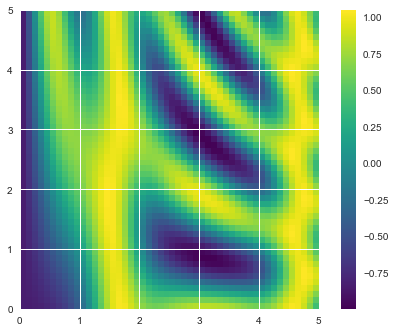

In [59]:
plt.imshow(z, origin = 'lower', extent=[0,5,0,5], cmap='viridis')
plt.colorbar();

# Comparisons, Masks, and Boolean Logic

### Example: Counting Rainy Days

In [89]:
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254. # 1/10mm -> inches
inches.shape

(365,)

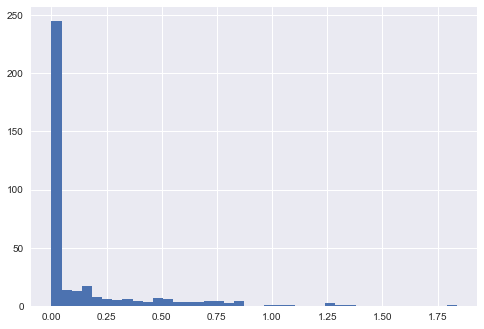

In [90]:
sns.set()
plt.hist(inches, 40);

## Comparison Operators as ufuncs

In [67]:
x = np.array([1,2,3,4,5])

In [68]:
x < 3

array([ True,  True, False, False, False], dtype=bool)

In [69]:
x > 3

array([False, False, False,  True,  True], dtype=bool)

In [70]:
x <= 3

array([ True,  True,  True, False, False], dtype=bool)

In [71]:
x >= 3

array([False, False,  True,  True,  True], dtype=bool)

In [72]:
x != 3

array([ True,  True, False,  True,  True], dtype=bool)

In [73]:
x == 3

array([False, False,  True, False, False], dtype=bool)

In [74]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False], dtype=bool)

In [75]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3,4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [76]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]], dtype=bool)

## Working with Boolean Arrays

#### Counting entries

In [77]:
print x

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


In [78]:
# how many values less than 6?
np.count_nonzero(x < 6)

8

In [79]:
np.sum(x<6)

8

In [80]:
# how many values less than 6 in each row?
np.sum(x<6, axis=1)

array([4, 2, 2])

In [81]:
# are there any values greater than 8?
np.any(x > 8)

True

In [82]:
# any values less than zero?
np.any(x < 0)

False

In [83]:
# Are all values less than 10?
np.all(x < 10)

True

In [84]:
# Are all values equal to 6?
np.all(x == 6)

False

In [85]:
# are all values in each row less than 8?
np.all(x<8, axis=1)

array([ True, False,  True], dtype=bool)

#### Boolean Operators

In [92]:
# How many days of rainfall between 0.5 & 1.0 inches?
np.sum((inches > 0.5) & (inches < 1))

29

In [93]:
# How many days of rainfall not less than or equal to 0.5 OR greater than or equal to 1.0?
np.sum(~( (inches <= 0.5) | (inches >= 1) ))

29

| Operator | Equivalent ufunc |
|:---------------:|:------------------:|
| &      | np.bitwise_and        |
| &#x7c;     | np.bitwise_or    
| ^       | np.bitwise_xor       |
| ~        | np.bitwise_not       |

In [97]:
print "Number of days without rain: ", np.sum(inches == 0)
print "Number of days with rain: ", np.sum(inches != 0)
print "Days with more than 0.5 inches: ", np.sum(inches > 0.5)
print "Rainy days with < 0.2 inches: ", np.sum((inches > 0) & (inches < 0.2))

Number of days without rain:  215
Number of days with rain:  150
Days with more than 0.5 inches:  37
Rainy days with < 0.2 inches:  75


#### Boolean Arrays as Masks

In [98]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [99]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]], dtype=bool)

In [100]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

In [101]:
# construct a mask of all rainy days
rainy = (inches > 0)

# construct a mask of all summer days (June 21st is the 172nd day)
summer = (np.arange(365) - 172 < 90) & (np.arange(365) - 172 > 0)

print "Median precip on rainy days in 2014 (inches): ", np.median(inches[rainy])
print "Median precip on summer days in 2014 (inches): ", np.median(inches[summer])
print "Maximum precip on summer days in 2014 (inches): ", np.max(inches[summer])
print "Median precip on non-summer rainy days in 2014 (inches): ", np.median(inches[rainy & ~summer])

Median precip on rainy days in 2014 (inches):  0.194881889764
Median precip on summer days in 2014 (inches):  0.0
Maximum precip on summer days in 2014 (inches):  0.850393700787
Median precip on non-summer rainy days in 2014 (inches):  0.200787401575
